# NAME : PATEL CHINTAN DAHYALAL

## TOPIC : FACIES IDENTIFICATION USING MACHINE LEARNING

### M.TECH THESIS PART 2

#### Exploring Dataset 

First, we will examine the data set we will use to train the classifier. The training data is contained in the file train.csv. The dataset consists of 5 wireline log measurements, two indicator variables and a facies label at half foot intervals. In machine learning terminology, each log measurement is a feature vector that maps a set of 'features' (the log measurements) to a class (the facies type). We will use the pandas library to load the data into a dataframe, which provides a convenient data structure to work with well log data.

#### Step 01 Importing Relevent Library : 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
training_data = pd.read_csv("train.csv")

In [3]:
training_data.head(30)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787


In [4]:
print(training_data.shape)

(4149, 11)


In [5]:
pd.DataFrame(training_data.dtypes).T

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,int64,object,object,float64,float64,float64,float64,float64,float64,int64,float64


##### Remove a single well to use as a blind test later.

In [6]:
blind = training_data[training_data['Well Name'] == 'SHANKLE']
training_data = training_data[training_data['Well Name'] != 'SHANKLE']
print(training_data.shape)

(3700, 11)


# About Dataset

This data is from the Council Grove gas reservoir in Southwest Kansas. The Panoma Council Grove Field is predominantly a carbonate gas reservoir encompassing 2700 square miles in Southwestern Kansas. This dataset is from nine wells (with 4149 examples), consisting of a set of seven predictor variables and a rock facies (class) for each example vector and validation (test) data (830 examples from two wells) having the same seven predictor variables in the feature vector. Facies are based on examination of cores from nine wells taken vertically at half-foot intervals. Predictor variables include five from wireline log measurements and two geologic constraining variables that are derived from geologic knowledge. These are essentially continuous variables sampled at a half-foot sample rate.

##### The seven predictor variables are:
Five wire line log curves include gamma ray (GR), resistivity logging (ILD_log10), photoelectric effect (PE), neutron-density porosity difference and average neutron-density porosity (DeltaPHI and PHIND). Note, some wells do not have PE.
##### Two geologic constraining variables: nonmarine-marine indicator (NM_M) and relative position (RELPOS)
##### The nine discrete facies (classes of rocks) are:
  •	Nonmarine sandstone
  •	Nonmarine coarse siltstone
  •	Nonmarine fine siltstone
  •	Marine siltstone and shale
  •	Mudstone (limestone)
  •	Wackestone (limestone)
  •	Dolomite
  •	Packstone-grainstone (limestone)
  •	Phylloid-algal bafflestone (limestone)

These facies aren't discrete, and gradually blend into one another. Some have neighbouring facies that are rather close. Mislabelling within these neighbouring facies can be expected to occur. The following table lists the facies, their abbreviated labels and their approximate neighbours.


#### Step 02 : Lets clean up dataset to use

In [7]:
#The 'Well Name' and 'Formation' columns can be turned into a categorical data type.
training_data['Well Name'] = training_data['Well Name'].astype('category')
training_data['Formation'] = training_data['Formation'].astype('category')


In [8]:
#check unique category present inside well name
training_data['Well Name'].unique()

['SHRIMPLIN', 'ALEXANDER D', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
Categories (9, object): ['SHRIMPLIN', 'ALEXANDER D', 'LUKE G U', 'KIMZEY A', ..., 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']

In [9]:
#check unique category present inside formation
training_data["Formation"].unique()

['A1 SH', 'A1 LM', 'B1 SH', 'B1 LM', 'B2 SH', ..., 'B4 LM', 'B5 SH', 'B5 LM', 'C SH', 'C LM']
Length: 14
Categories (14, object): ['A1 SH', 'A1 LM', 'B1 SH', 'B1 LM', ..., 'B5 SH', 'B5 LM', 'C SH', 'C LM']

#These are the names of the 10 training wells in the Council Grove reservoir. Data has been recruited into pseudo-well 'Recruit F9' to better represent facies 9, the Phylloid-algal bafflestone.

Before we plot the well data, let's define a color map so the facies are represented by consistent color in all the plots in this tutorial. We also create the abbreviated facies labels, and add those to the facies_vectors dataframe.

In [10]:
# 1=sandstone  2=c_siltstone (c means course)   3=f_siltstone (f means fines)
# 4=marine_silt_shale 5=mudstone(lm) 6=wackestone(lm) 7=dolomite
# 8=packstone(lm) 9=bafflestone(lm)

#following code is hexacode for colour arguments
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

#Abreviation for different facies are following and it is in order of above list
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

In [11]:
#facies_color_map is a dictionary that maps facies labels to their respective colors
#enumerate is making truple for iteration and labes 
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

In [12]:
#it will use to provide colour argument in graphs to provide colour to facies
facies_color_map

{'SS': '#F4D03F',
 'CSiS': '#F5B041',
 'FSiS': '#DC7633',
 'SiSh': '#6E2C00',
 'MS': '#1B4F72',
 'WS': '#2E86C1',
 'D': '#AED6F1',
 'PS': '#A569BD',
 'BS': '#196F3D'}

In [13]:
training_data["Facies"].unique()

array([3, 2, 8, 6, 7, 4, 5, 9, 1], dtype=int64)

In [14]:
#adding facies_lable to training dataset 
#As index starts with zero hence row["Facies"] indicate number of element in facies_label which actually has index one less
def label_facies(row, labels):
    return labels[ row['Facies'] -1]

In [15]:
training_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [16]:
#apply function applied to axis = 1 means to particular columns or row wise
#row == training_data
#facies_label already listed in list
#facies_label[ row["facies"] - 1]
         #above term indicate index  #select element of that index from facies_label
#minus one is for python index starts from zero and facies number from 1 to 9
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)


In [17]:
training_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS


In [18]:
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,2783.000000,3700.000000,3700.000000
mean,4.615676,2908.853378,64.873649,0.663053,4.651677,12.892826,3.805693,1.540000,0.524125
std,2.475808,139.010855,30.817166,0.253863,5.109006,6.796219,0.894118,0.498465,0.287147
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2818.500000,43.778250,0.502000,1.800000,8.350000,3.200000,1.000000,0.278000
50%,4.000000,2939.000000,64.817000,0.645613,4.400000,11.857500,3.600000,2.000000,0.531000
75%,7.000000,3015.125000,80.322500,0.823000,7.600000,15.750000,4.400000,2.000000,0.772000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


This is a quick view of the statistical distribution of the input variables. Looking at the count values, most values have 4149 valid values except for PE, which has 3232. In this  we will drop the feature vectors that don't have a valid PE entry.

In [19]:
#Cheking null values
training_data.isnull().sum()

Facies            0
Formation         0
Well Name         0
Depth             0
GR                0
ILD_log10         0
DeltaPHI          0
PHIND             0
PE              917
NM_M              0
RELPOS            0
FaciesLabels      0
dtype: int64

<AxesSubplot:>

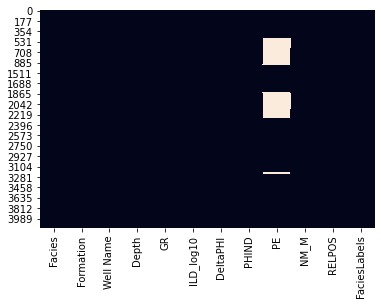

In [20]:
sns.heatmap(training_data.isnull() , cbar=False)

In [21]:
training_data.dropna(inplace=True)

<AxesSubplot:>

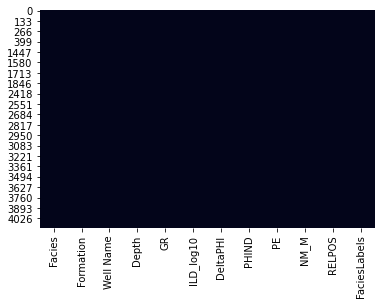

In [22]:
sns.heatmap(training_data.isnull() , cbar = False)

#### Step 03 Vizulization of Data

In [23]:
#logs is data for particular well to present inside graph
#facies_colors is dictionary for color argument for different facies
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth for only particular depth to get actual visulization
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    #values will take all values present inside facies 
    #here expand_dims changes dimention of array taken from values
    #axis = 1 means columns = 1 or add each component in new raw (n,1)
    #repeat will repeat argument of each rows element and repeat it 100 times and axis = 1 means 
    #increase it columnwise hence again dimention of arry changes (n,100) 100 element added to each rows
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,axis = 1), 100, 1)
    
    #following line is fix graphs in 6 columns
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    #following five graphs directly log vs depths
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    
    #following line of code is used for cluster map based on number argument
    #whereever 3 means indicating one facing and color argument is based on facies_color list pssed in cmap_facies
    #vmin = 1 and vmax = 9 indicate max and minimum values
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    #following lines of code is to set color bar map at right of last graphs
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    #set label as gievn in list and make 17 spaces between them..remember join add component to component .....
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    #setting labels and limits to dataset on x axis
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    #following is set common label to all and list is empty means it takes y axis values such as depth 
    #Else at every depth legends can be defined by passing set_ytick .............
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    
    #following is subplot commmon title for all wells
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)               
                   
                   

#Placing the log plotting code in a function will make it easy to plot the logs from multiples wells, and can be reused later to view the results when we apply the facies classification model to other wells. The function was written to take a list of colors and facies labels as parameters.

We then show log plots for wells SHRIMPLIN.

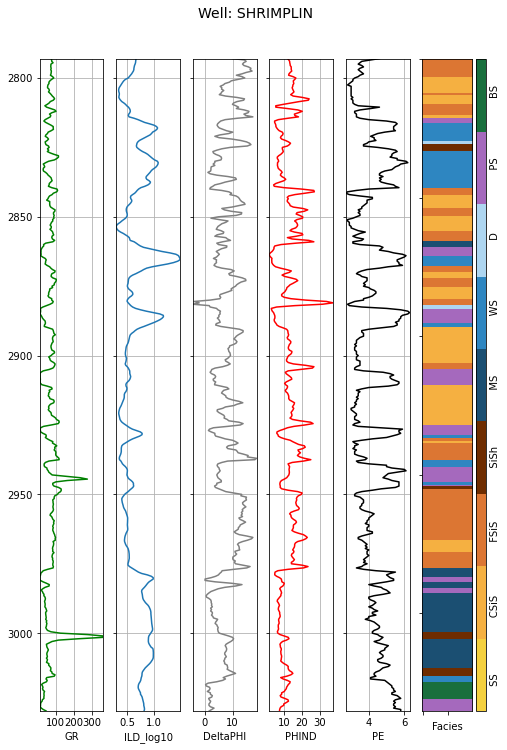

In [24]:
make_facies_log_plot(
    training_data[training_data['Well Name'] == 'SHRIMPLIN'],
    facies_colors)

 In addition to individual wells, we can look at how the various facies are represented by the entire training set. Let's plot a histgram of the number of training examples for each facies class.

1    170
2    649
3    498
4    177
5    198
6    391
7     81
8    458
9    161
Name: Facies, dtype: int64

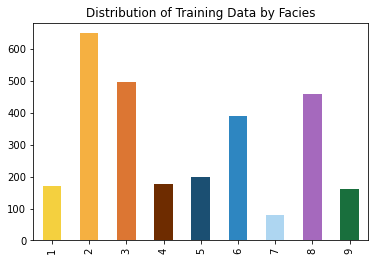

In [25]:
#count the number of unique entries for each facies, 
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

In [26]:
#use facies labels to index each count
facies_counts.index = facies_labels


#This shows the distribution of examples by facies for the 3232 training examples in the training set. Dolomite (facies 7) has the fewest with 141 examples. There are also only 185 bafflestone examples. Depending on the performance of the classifier we are going to train, we may consider getting more examples of these facies.

Crossplots are a familiar tool in the geosciences to visualize how two properties vary with rock type. This dataset contains 5 log variables, and scatter matrix can help to quickly visualize the variation between the all the variables in the dataset. We can employ the very useful Seaborn library to quickly create a nice looking scatter matrix. Each pane in the plot shows the relationship between two of the variables on the x and y axis, with each point is colored according to its facies. The same colormap is used to represent the 9 facies.

#Before performing pairplot , necessory to remove unnecessory features such as well name , facies number, formation name, depth,marine classification , relative position etc 
#facies labels gieven as hue parameter where colour variation is as per above figures and for that palette argument given as dictionary and presentation of hue_order is just reversed one

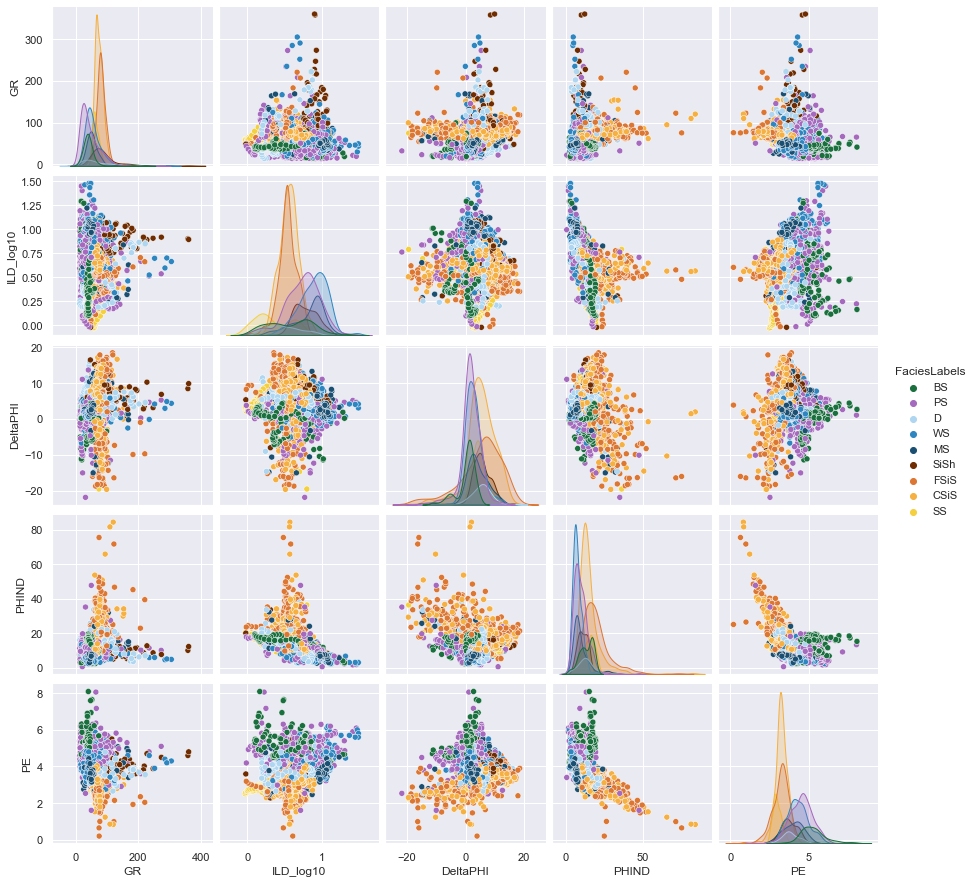

In [27]:
import seaborn as sns
sns.set()
sns.pairplot(training_data.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)))

#### Step 04 : Conditioning the dataset

Lets extract varible which are input for classification problem

Now we extract just the feature variables we need to perform the classification. The predictor variables are the five wireline values and two geologic constraining variables. We also get a vector of the facies labels that correspond to each feature vector

In [28]:
correct_facies_labels = training_data['Facies'].values
correct_facies_labels

array([3, 3, 3, ..., 5, 5, 5], dtype=int64)

In [29]:
#Drop columns which are not important for classification problem such as depth , facies, facieslable , well name etc
feature_vectors = training_data.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)
feature_vectors.describe()

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000
mean,66.249445,0.644637,3.754963,13.118929,3.805693,1.523895,0.523057
std,31.610849,0.241922,5.045916,7.389665,0.894118,0.499518,0.287499
min,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,46.081500,0.497000,1.300000,8.165000,3.200000,1.000000,0.276500
50%,65.541000,0.627000,3.581000,11.900000,3.600000,2.000000,0.529000
75%,80.714000,0.812323,6.500000,16.144000,4.400000,2.000000,0.771500
max,361.150000,1.480000,18.500000,84.400000,8.094000,2.000000,1.000000


#### There are no need to check outliers or guassian distribution for each dataset because SVM algorithm is independent to probability density function

#### Step 05 : scalling dataset

Scikit includes a preprocessing module that can 'standardize' the data (giving each variable zero mean and unit variance, also called whitening). Many machine learning algorithms assume features will be standard normally distributed data (ie: Gaussian with zero mean and unit variance). The factors used to standardize the training set must be applied to any subsequent feature set that will be input to the classifier. The StandardScalar class can be fit to the training set, and later used to standardize any training data.

In [30]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [31]:
scaled_features

array([[ 0.35438997,  0.0800519 ,  1.21804274, ...,  0.88852816,
        -1.04898873,  1.65923587],
       [ 0.38001869,  0.06764897,  2.0703702 , ...,  0.32921752,
        -1.04898873,  1.58617895],
       [ 0.4050146 ,  0.05524605,  2.18929961, ..., -0.23009312,
        -1.04898873,  1.50964312],
       ...,
       [-0.5230298 ,  1.32034445, -0.16451168, ..., -0.68872785,
         0.95329909,  0.50771957],
       [-0.46765911,  1.32447875, -0.13319361, ..., -0.73123546,
         0.95329909,  0.47988836],
       [-0.513158  ,  1.3451503 , -0.22714784, ..., -0.57127262,
         0.95329909,  0.45205715]])

Scikit also includes a handy function to randomly split the training data into training and test sets. The test set contains a small subset of feature vectors that are not used to train the network. Because we know the true facies labels for these examples, we can compare the results of the classifier to the actual facies and determine the accuracy of the model. Let's use 20% of the data for the test set.

#### Step 05 : splitting dataset for validation

In [32]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=42)

#### Step 06 : Training SVM classifier

Now we use the cleaned and conditioned training set to create a facies classifier. As mentioned above, we will use a type of machine learning model known as a support vector machine. The SVM is a map of the feature vectors as points in a multi dimensional space, mapped so that examples from different facies are divided by a clear gap that is as wide as possible.

The SVM implementation in scikit-learn takes a number of important parameters. First we create a classifier using the default settings.

In [33]:
from sklearn import svm

clf = svm.SVC()

In [34]:
#Now we can train the classifier using the training set we created above.
clf.fit(X_train,y_train)

SVC()

In [35]:
predicted_labels = clf.predict(X_test)

#### Step 07 : evaluation of model

We need some metrics to evaluate how good our classifier is doing. A confusion matrix is a table that can be used to describe the performance of a classification model. Scikit-learn allows us to easily create a confusion matrix by supplying the actual and predicted facies labels.

The confusion matrix is simply a 2D array. The entries of confusion matrix C[i][j] are equal to the number of observations predicted to have facies j, but are known to have facies i.

To simplify reading the confusion matrix, a function has been written to display the matrix along with facies labels and various error metrics. See the file classification_utilities.py in this repo for the display_cm() function.

In [36]:
def display_cm(cm, labels, hide_zeros=False,
                             display_metrics=False):
    """Display confusion matrix with labels, along with
       metrics such as Recall, Precision and F1 score.
       Based on Zach Guo's print_cm gist at
       https://gist.github.com/zachguo/10296432
    """
   #Precision is facies predicted / total predicted...actual predicted sst out of actual sst present 
    precision = np.diagonal(cm)/cm.sum(axis=0).astype('float')
    #Recall is actual / no of times predicted that facies....actual predicted sst out of predicted sst
    recall = np.diagonal(cm)/cm.sum(axis=1).astype('float')
    F1 = 2 * (precision * recall) / (precision + recall)
    
    precision[np.isnan(precision)] = 0
    recall[np.isnan(recall)] = 0
    F1[np.isnan(F1)] = 0
    
    total_precision = np.sum(precision * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_recall = np.sum(recall * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_F1 = np.sum(F1 * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    #print total_precision
    
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + " Pred", end=' ')
    for label in labels: 
        print("%{0}s".format(columnwidth) % label, end=' ')
    print("%{0}s".format(columnwidth) % 'Total')
    print("    " + " True")
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=' ')
        for j in range(len(labels)): 
            cell = "%{0}d".format(columnwidth) % cm[i, j]
            if hide_zeros:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            print(cell, end=' ')
        print("%{0}d".format(columnwidth) % sum(cm[i,:]))
        
    if display_metrics:
        print()
        print("Precision", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % precision[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_precision)
        print("   Recall", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % recall[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_recall)
        print("       F1", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % F1[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_F1)
        
    print(" "*5,"Total F1 Score for method : {}".format(total_F1))

In [37]:
def display_adj_cm(
        cm, labels, adjacent_facies, hide_zeros=False, 
        display_metrics=False):
    """This function displays a confusion matrix that counts 
       adjacent facies as correct.
    """
    adj_cm = np.copy(cm)
    
    for i in np.arange(0,cm.shape[0]):
        for j in adjacent_facies[i]:
            adj_cm[i][i] += adj_cm[i][j]
            adj_cm[i][j] = 0.0
        
    display_cm(adj_cm, labels, hide_zeros, 
                             display_metrics)

In [38]:
from sklearn.metrics import confusion_matrix
#from classification_utilities import display_cm, display_adj_cm

conf = confusion_matrix(y_test, predicted_labels)
display_cm(conf, facies_labels, hide_zeros=True)


     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    19    19     1                                        39
     CSiS         102    28                                       130
     FSiS          33    49           1                 1          84
     SiSh           1          24           6           2          33
       MS           2     1     2     2    42     1    10          60
       WS                       7          43     2    19     1    72
        D                       1                 9     7          17
       PS                 2     1     2    22          56     5    88
       BS                                   1          11    22    34
      Total F1 Score for method : 0.5630313149746078


#The rows of the confusion matrix correspond to the actual facies labels. The columns correspond to the labels assigned by the classifier. For example, consider the first row. For the feature vectors in the test set that actually have label SS, 19 were correctly indentified as SS, 19 were classified as CSiS and 1 were classified as FSiS.

The entries along the diagonal are the facies that have been correctly classified. Below we define two functions that will give an overall value for how the algorithm is performing. The accuracy is defined as the number of correct classifications divided by the total number of classifications.

In [39]:
 def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

#As noted above, the boundaries between the facies classes are not all sharp, and some of them blend into one another. The error within these 'adjacent facies' can also be calculated. We define an array to represent the facies adjacent to each other. For facies label i, adjacent_facies[i] is an array of the adjacent facies labels.

In [40]:
adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])
def accuracy_adjacent(conf, adjacent_facies):
    nb_classes = conf.shape[0]
    total_correct = 0.
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
        for j in adjacent_facies[i]:
            total_correct += conf[i][j]
    return total_correct / sum(sum(conf))

<ipython-input-40-76b5ba936ab3>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])


#### Step 08 : Model Parameter Selection


The classifier so far has been built with the default parameters. However, we may be able to get improved classification results with optimal parameter choices.

We will consider two parameters. The parameter C is a regularization factor, and tells the classifier how much we want to avoid misclassifying training examples. A large value of C will try to correctly classify more examples from the training set, but if C is too large it may 'overfit' the data and fail to generalize when classifying new data. If C is too small then the model will not be good at fitting outliers and will have a large error on the training set.

The SVM learning algorithm uses a kernel function to compute the distance between feature vectors. Many kernel functions exist, but in this case we are using the radial basis function rbf kernel (the default). The gamma parameter describes the size of the radial basis functions, which is how far away two vectors in the feature space need to be to be considered close.

We will train a series of classifiers with different values for C and gamma. Two nested loops are used to train a classifier for every possible combination of values in the ranges specified. The classification accuracy is recorded for each combination of parameter values. The results are shown in a series of plots, so the parameter values that give the best classification accuracy on the test set can be selected.

This process is also known as 'cross validation'. Often a separate 'cross validation' dataset will be created in addition to the training and test sets to do model selection. For this tutorial we will just use the test set to choose model parameters.

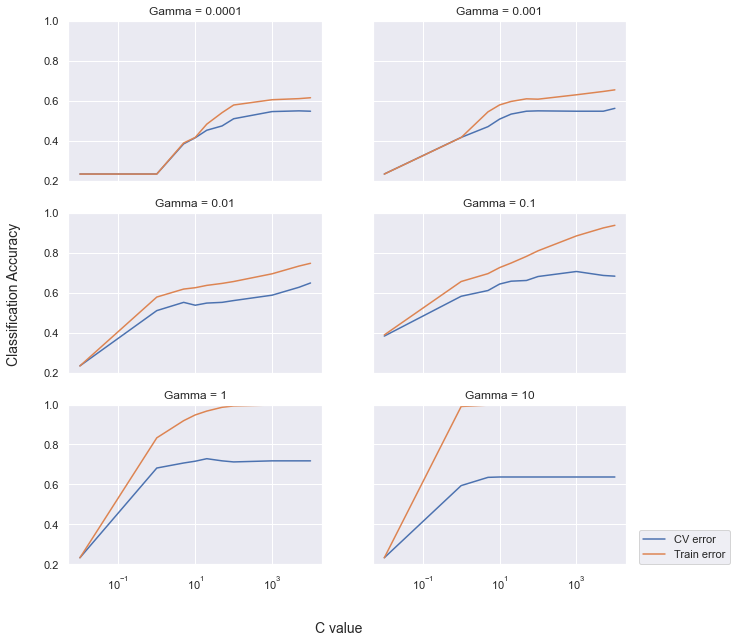

In [41]:
#to true to run the parameter loop
do_model_selection = True

if do_model_selection:
    C_range = np.array([.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000])
    gamma_range = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10])
    
    fig, axes = plt.subplots(3, 2, 
                        sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0
    for outer_ind, gamma_value in enumerate(gamma_range):
        row = int(plot_number / 2) 
        column = int(plot_number % 2)
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):
            
            clf = svm.SVC(C=c_value, gamma=gamma_value)
            clf.fit(X_train,y_train)
            
            train_conf = confusion_matrix(y_train, clf.predict(X_train))
            cv_conf = confusion_matrix(y_test, clf.predict(X_test))
        
            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)

        ax = axes[row, column]
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='CV error')
        ax.semilogx(C_range, train_errors, label='Train error')
        plot_number += 1
        ax.set_ylim([0.2,1])
        
    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=14)
             
    fig.text(0.04, 0.5, 'Classification Accuracy', va='center', 
             rotation='vertical', fontsize=14)


#The best accuracy on the cross validation error curve was achieved for gamma = 1, and C = 10. We can now create and train an optimized classifier based on these parameters:

In [42]:
clf = svm.SVC(C=10, gamma=1)        
clf.fit(X_train, y_train)

cv_conf = confusion_matrix(y_test, clf.predict(X_test))

print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(cv_conf, adjacent_facies))

Optimized facies classification accuracy = 0.72
Optimized adjacent facies classification accuracy = 0.92


In [43]:
display_cm(cv_conf, facies_labels, 
           display_metrics=True,hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    30     8     1                                        39
     CSiS     2   109    17                             2         130
     FSiS     2    23    55     3     1                            84
     SiSh           1          27     1     2           2          33
       MS           2     2     5    29    14           8          60
       WS                       7     8    45     1     9     2    72
        D                       1     2          10     3     1    17
       PS                 3     1     3    14          63     4    88
       BS                                               3    31    34

Precision  0.88  0.76  0.71  0.61  0.66  0.60  0.91  0.70  0.82  0.72
   Recall  0.77  0.84  0.65  0.82  0.48  0.62  0.59  0.72  0.91  0.72
       F1  0.82  0.80  0.68  0.70  0.56  0.61  0.71  0.71  0.86  0.71
      Total F1 Score for method : 0.7132857331717436


#To interpret these results, consider facies SS. In our test set, if a sample was labeled SS the probability the sample was correct is 0.8 (precision). If we know a sample has facies SS, then the probability it will be correctly labeled by the classifier is 0.78 (recall). It is desirable to have high values for both precision and recall, but often when an algorithm is tuned to increase one, the other decreases. The F1 score combines both to give a single measure of relevancy of the classifier results.

These results can help guide intuition for how to improve the classifier results. For example, for a sample with facies MS or mudstone, it is only classified correctly 57% of the time (recall). Perhaps this could be improved by introducing more training samples. Sample quality could also play a role. Facies BS or bafflestone has the best F1 score and relatively few training examples. But this data was handpicked from other wells to provide training examples to identify this facies.

We can also consider the classification metrics when we consider misclassifying an adjacent facies as correct:

In [60]:
 display_adj_cm(cv_conf, facies_labels, adjacent_facies, 
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    66          23                                        89
     CSiS          89                                              89
     FSiS     2         114                             1         117
     SiSh                       1           5           1           7
       MS                             8                 9     2    19
       WS                 3     3          65                      71
        D                 4     1     3           9                17
       PS                             1                39          40
       BS                                                           0

Precision  0.97  1.00  0.79  0.20  0.67  0.93  1.00  0.78  0.00  0.88
   Recall  0.74  1.00  0.97  0.14  0.42  0.92  0.53  0.97  0.00  0.87
       F1  0.84  1.00  0.87  0.17  0.52  0.92  0.69  0.87  0.00  0.87
      Total F1 Score for method : 0.8661579747276168


<ipython-input-36-394c7a8d1693>:11: RuntimeWarning: invalid value encountered in true_divide
  recall = np.diagonal(cm)/cm.sum(axis=1).astype('float')


In [101]:
adjust_facies = np.array([[2], [1,3], [2], [5], [4,6], [5,7,8], [6,8], [6,7,9], [7,8]])

<ipython-input-101-05a0ce364c5f>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  adjust_facies = np.array([[2], [1,3], [2], [5], [4,6], [5,7,8], [6,8], [6,7,9], [7,8]])


In [102]:
Actual_facies = np.array([1,2,3,4,5,6,7,8,9])

In [103]:
Adjusted_facies_dataframe = pd.DataFrame(Actual_facies , columns = ["Facies"])

In [104]:
Adjusted_facies_dataframe["Adjusted_Facies"] = adjust_facies

In [105]:
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

In [106]:
dictionary = {}
for k,i in enumerate(facies_labels , 1) :
    dictionary[k] = i 
dictionary


{1: 'SS',
 2: 'CSiS',
 3: 'FSiS',
 4: 'SiSh',
 5: 'MS',
 6: 'WS',
 7: 'D',
 8: 'PS',
 9: 'BS'}

In [107]:
Adjusted_facies_dataframe["FaciesLabel"] = Adjusted_facies_dataframe["Facies"].map(dictionary)

In [108]:
Adjusted_facies_dataframe

,Facies,Adjusted_Facies,FaciesLabel
0,1,[2],SS
1,2,"[1, 3]",CSiS
2,3,[2],FSiS
3,4,[5],SiSh
4,5,"[4, 6]",MS
5,6,"[5, 7, 8]",WS
6,7,"[6, 8]",D
7,8,"[6, 7, 9]",PS
8,9,"[7, 8]",BS


#Considering adjacent facies, the F1 scores for all facies types are above 0.9, except when classifying SiSh or marine siltstone and shale. The classifier often misclassifies this facies (recall of 0.66), most often as wackestone.

These results are comparable to those reported in Dubois et al. (2007).

#### step 09 Applying the classification model to the blind data¶
We held a well back from the training, and stored it in a dataframe called blind:

In [45]:
blind

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
937,2,A1 SH,SHANKLE,2774.5,98.36,0.642,-0.1,18.685,2.9,1,1.000
938,2,A1 SH,SHANKLE,2775.0,97.57,0.631,7.9,16.745,3.2,1,0.984
939,2,A1 SH,SHANKLE,2775.5,98.41,0.615,12.8,14.105,3.2,1,0.968
940,2,A1 SH,SHANKLE,2776.0,85.92,0.597,13.0,13.385,3.4,1,0.952
941,2,A1 SH,SHANKLE,2776.5,83.16,0.592,12.3,13.345,3.4,1,0.935
...,...,...,...,...,...,...,...,...,...,...,...
1381,8,C LM,SHANKLE,3006.0,32.84,1.120,-2.2,3.455,5.1,2,0.060
1382,8,C LM,SHANKLE,3006.5,25.16,1.112,-1.6,2.890,4.8,2,0.045
1383,8,C LM,SHANKLE,3007.0,25.16,1.112,-1.6,2.890,4.8,2,0.030
1384,4,C LM,SHANKLE,3007.5,26.22,1.092,-0.4,3.400,4.5,2,0.030


In [46]:
y_blind = blind['Facies'].values
print(y_blind)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 2 2 2 2 3 3 8 8 8 8 6 6 6 6 6 6 6
 6 6 6 8 8 8 8 8 8 8 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3
 3 3 3 3 8 8 8 8 8 6 6 6 6 6 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2
 2 2 2 2 3 3 3 6 6 6 6 6 6 6 3 3 3 3 3 3 2 2 2 2 2 2 3 3 3 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 3 3 3 3 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 6 6 6 6 6 6
 3 3 3 3 3 3 3 3 3 3 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 6 8 8 8 8 8 5 5 5 5 5 7 7 7 7 7 7 7 7 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 8 8
 8 8 8 4 4]


In [47]:
#The label vector is just the Facies column:

In [48]:
well_features = blind.drop(['Facies', 'Formation', 'Well Name', 'Depth'], axis=1)

In [49]:
# Now we can transform this with the scaler we made before:

In [50]:
X_blind = scaler.transform(well_features)

In [51]:
#Now it's a simple matter of making a prediction and storing it back in the dataframe:

In [52]:
y_pred = clf.predict(X_blind)
blind['Prediction'] = y_pred

In [53]:
#Let's see how we did with the confusion matrix:

In [54]:
cv_conf = confusion_matrix(y_blind, y_pred)

print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(cv_conf, adjacent_facies))

Optimized facies classification accuracy = 0.41
Optimized adjacent facies classification accuracy = 0.87


#We managed 0.75 using the test data, but it was from the same wells as the training data. This more reasonable test does not perform as well...

In [55]:
display_cm(cv_conf, facies_labels,
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS     6    60    23                                        89
     CSiS    14    61    14                                        89
     FSiS     2    51    63                             1         117
     SiSh                       1           5           1           7
       MS                       3     1     4           9     2    19
       WS                 3     3    21    28          16          71
        D                 4     1     3           2     7          17
       PS                             1    12     2    24     1    40
       BS                                                           0

Precision  0.27  0.35  0.59  0.12  0.04  0.57  0.50  0.41  0.00  0.43
   Recall  0.07  0.69  0.54  0.14  0.05  0.39  0.12  0.60  0.00  0.41
       F1  0.11  0.47  0.56  0.13  0.04  0.47  0.19  0.49  0.00  0.39
      Total F1 Score for method : 0.38925767766719743


<ipython-input-36-394c7a8d1693>:11: RuntimeWarning: invalid value encountered in true_divide
  recall = np.diagonal(cm)/cm.sum(axis=1).astype('float')


In [56]:
#...but does remarkably well on the adjacent facies predictions.

In [57]:
display_adj_cm(cv_conf, facies_labels, adjacent_facies,
               display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    66          23                                        89
     CSiS          89                                              89
     FSiS     2         114                             1         117
     SiSh                       1           5           1           7
       MS                             8                 9     2    19
       WS                 3     3          65                      71
        D                 4     1     3           9                17
       PS                             1                39          40
       BS                                                           0

Precision  0.97  1.00  0.79  0.20  0.67  0.93  1.00  0.78  0.00  0.88
   Recall  0.74  1.00  0.97  0.14  0.42  0.92  0.53  0.97  0.00  0.87
       F1  0.84  1.00  0.87  0.17  0.52  0.92  0.69  0.87  0.00  0.87
      Total F1 Score for method : 0.8661579747276168


<ipython-input-36-394c7a8d1693>:11: RuntimeWarning: invalid value encountered in true_divide
  recall = np.diagonal(cm)/cm.sum(axis=1).astype('float')


In [58]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

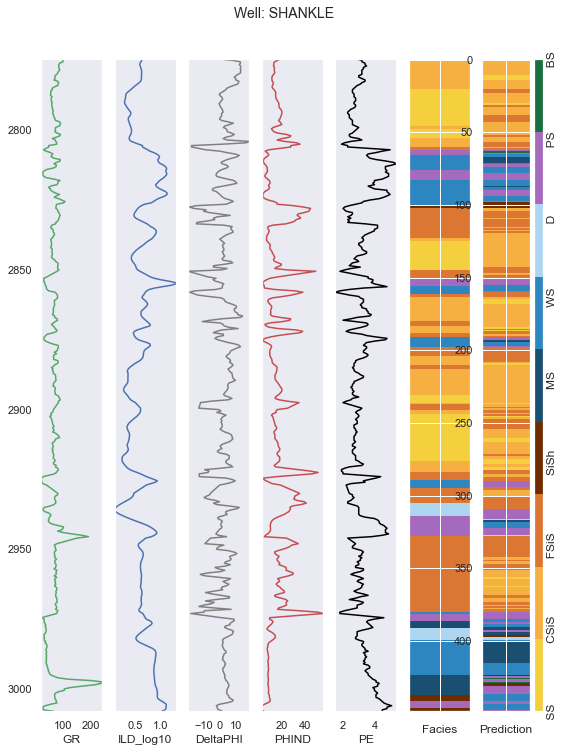

In [59]:
compare_facies_plot(blind, 'Prediction', facies_colors)
